In [33]:
import ROOT
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation
from xgboost_wrapper import XGBoostClassifier

import matplotlib.pyplot as plt

from mlp import make_predictions, train_mlp
from utils import printFrame,makePlotName,makeSigBkg,saveFig

import numpy as np

import os

%matplotlib inline

In [34]:
workspace_file = 'workspace_transfer.root'
vars_g = ['x']
dir='.'
model_g='mlp'
verbose_printing=False

In [35]:
# Statistical model
w = ROOT.RooWorkspace('w')
#w.factory("EXPR::f1('cos(x)**2 + .01',x)")
w.factory("EXPR::f1('exp(-(x-2.5)**2/1.)',x[0,20])")
#w.factory("EXPR::f1('exp(-(x-10.5)**2/5.)',x)")
w.factory("EXPR::f0('exp(-(2.*x))',x)")
#w.factory("SUM::f2(c1[0.5]*f0,c2[0.5]*f1)")

# Check Model
w.Print()
if verbose_printing == True:
     printFrame(w,['x'],[w.pdf('f0'),w.pdf('f1')],'transfered',['f0','f1']
    ,dir=dir,model_g=model_g,range=[-15,20],title='Single distributions',x_text='x0',y_text='p(x)',
     print_pdf=True)

Making Data


[]

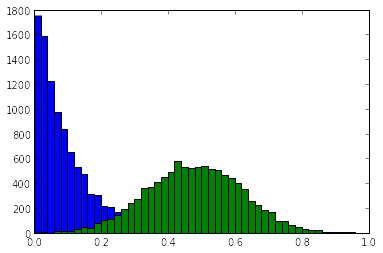

In [36]:
# Start generating data
num_train = 10000
num_test = 5000
no_train = False

print 'Making Data'
# Start generating data

   
# make data from root pdf
def makeDataFi(x, pdf, num):
    traindata = np.zeros((num,len(vars_g))) 
    data = pdf.generate(x,num)
    traindata[:] = [[data.get(i).getRealValue(var) for var in vars_g]
        for i in range(num)]
    return traindata
  
  # features
vars = ROOT.TList()
for var in vars_g:
    vars.Add(w.var(var))
x = ROOT.RooArgSet(vars)


train_data = np.zeros((num_train*2,len(vars_g) + 1))
test_data = np.zeros((num_test*2,len(vars_g) + 1))
f0_mean,f1_mean = (0.,0.)
f0_var,f1_var = (1.,1.)
f0_min,f1_min = (0.,0.)
f0_max,f1_max = (1.,1.)
if not no_train:
    #traindata[:num_train,0] =  makeDataFi(x,w.pdf('f0'), num_train).reshape(num_train)

    #traindata[num_train:,0] = makeDataFi(x,w.pdf('f1'), num_train).reshape(num_train)
    data_f0 =  makeDataFi(x,w.pdf('f0'), num_train)
    data_f1 = makeDataFi(x,w.pdf('f1'), num_train)
    train_data_unorm[:num_train,:len(vars_g)] =  data_f0

    train_data_unorm[num_train:,:len(vars_g)] = data_f1
    #Normalizing
    f0_mean,f0_var = (data_f0.mean(),data_f0.var())
    f1_mean,f1_var = (data_f1.mean(),data_f1.var())
    f0_min,f0_max = (data_f0.min(),data_f0.max())
    f1_min,f1_max = (data_f1.min(),data_f1.max())
    data_f0 = (data_f0-f0_min)/(f0_max-f0_min)
    data_f1 = (data_f1-f1_min)/(f1_max-f1_min)

    train_data[:num_train,:len(vars_g)] =  data_f0

    train_data[num_train:,:len(vars_g)] = data_f1
 
    train_data[:num_train,-1] = np.ones(num_train)
    train_data_unorm[:num_train,-1] = np.ones(num_train)

#testdata[:num_test,0] = makeDataFi(x, w.pdf('f0'), num_test).reshape(num_test)
#testdata[num_test:,0] = makeDataFi(x, w.pdf('f1'), num_test).reshape(num_test)
test_data[:num_test,:len(vars_g)] =  makeDataFi(x,w.pdf('f0'), num_test)

test_data[num_test:,:len(vars_g)] = makeDataFi(x,w.pdf('f1'), num_test)

test_data[num_test:,-1] = np.ones(num_test)

plt.hist(data_f0,bins=50)
plt.hist(data_f1,bins=50)
plt.plot()



In [37]:

model_file = 'train'
traindata = train_data[:,:-1]
targetdata = train_data[:,-1]
if model_g == 'mlp':
    train_mlp((traindata, targetdata), save_file='{0}/{1}_F0_F1.pkl'.format(dir,model_file))
else:
    rng = np.random.RandomState(seed)
    indices = rng.permutation(traindata.shape[0])
    traindata = traindata[indices]
    targetdata = targetdata[indices]
    scores = cross_validation.cross_val_score(clf, traindata, targetdata)
    print "Accuracy: {0} (+/- {1})".format(scores.mean(), scores.std() * 2)
    clf.fit(traindata,targetdata)
    #clf.plot_importance_matrix(vars_names)
    joblib.dump(clf, '{0}/{1}_F0_F1.pkl'.format(dir,model_file))


... building the model
... training
Epoch: 1, cost: 2.82273829951
Epoch: 2, cost: 1.52722445644
Epoch: 3, cost: 1.49035834506
Epoch: 4, cost: 1.48356282846
Epoch: 5, cost: 1.47975175613
Epoch: 6, cost: 1.47710655044
Epoch: 7, cost: 1.47518434922
Epoch: 8, cost: 1.47374083383
Epoch: 9, cost: 1.47262940466
Epoch: 10, cost: 1.47175760767
Epoch: 11, cost: 1.4710639952
Epoch: 12, cost: 1.47050593286
Epoch: 13, cost: 1.47005281991
Epoch: 14, cost: 1.46968209368
Epoch: 15, cost: 1.46937675481
Epoch: 16, cost: 1.46912376947
Epoch: 17, cost: 1.46891300099
Epoch: 18, cost: 1.46873647336
Epoch: 19, cost: 1.46858785034
Epoch: 20, cost: 1.46846205838
Epoch: 21, cost: 1.46835500829
Epoch: 22, cost: 1.4682633863
Epoch: 23, cost: 1.46818449483
Epoch: 24, cost: 1.46811612951
Epoch: 25, cost: 1.4680564833
Epoch: 26, cost: 1.46800407087
Epoch: 27, cost: 1.46795766856
Epoch: 28, cost: 1.46791626636
Epoch: 29, cost: 1.46787902925
Epoch: 30, cost: 1.46784526593
Epoch: 31, cost: 1.46781440341
Epoch: 32, cost

In [38]:
# Prediction function 
def predict(filename, traindata,model_g='mlp', sig=1):
  sfilename,k,j = filename.split('/')[-1].split('_')
  sfilename = '/'.join(filename.split('/')[:-1]) + '/' +  sfilename
  j = j.split('.')[0]
  sig = 1
  if k <> 'F0':
    k = int(k)
    j = int(j)
    sig = 1 if k < j else 0
    filename = '{0}_{1}_{2}.pkl'.format(sfilename,min(k,j),max(k,j))
  if model_g == 'mlp':
    return make_predictions(dataset=traindata, model_file=filename)[:,sig]
  else:
    clf = joblib.load(filename)
    if clf.__class__.__name__ == 'NuSVR':
      output = clf.predict(traindata)
      return np.clip(output,0.,1.)
    else:
      return clf.predict_proba(traindata)[:,sig]


In [39]:

bins = 80
low = 0.
high = 1.  
model_g='mlp'
c1_g=''
  
print 'Generating Score Histograms'

w.factory('score[{0},{1}]'.format(low,high))
s = w.var('score')
  
def saveHisto(w,outputs,s,bins,low,high,k='F0',j='F1'):
    
    print 'Estimating {0} {1}'.format(k,j)
    for l,name in enumerate(['sig','bkg']):
      data = ROOT.RooDataSet('{0}data_{1}_{2}'.format(name,k,j),"data",
          ROOT.RooArgSet(s))
      hist = ROOT.TH1F('{0}hist_{1}_{2}'.format(name,k,j),'hist',bins,low,high)
      values = outputs[l]
      #values = values[self.findOutliers(values)]
      for val in values:
        hist.Fill(val)
        s.setVal(val)
        data.add(ROOT.RooArgSet(s))
      norm = 1./hist.Integral()
      hist.Scale(norm) 
        
      s.setBins(bins)
      datahist = ROOT.RooDataHist('{0}datahist_{1}_{2}'.format(name,k,j),'hist',
            ROOT.RooArgList(s),hist)
      histpdf = ROOT.RooHistFunc('{0}histpdf_{1}_{2}'.format(name,k,j),'hist',
            ROOT.RooArgSet(s), datahist, 1)

      getattr(w,'import')(hist)
      getattr(w,'import')(data)
      getattr(w,'import')(datahist) # work around for morph = w.import(morph)
      getattr(w,'import')(histpdf) # work around for morph = w.import(morph)
      score_str = 'score'
      # Calculate the density of the classifier output using kernel density 
      #w.factory('KeysPdf::{0}dist_{1}_{2}({3},{0}data_{1}_{2},RooKeysPdf::NoMirror,2)'.format(name,k,j,score_str))


numtrain = traindata.shape[0]       
size2 = traindata.shape[1] if len(traindata.shape) > 1 else 1

outputs = [predict('/afs/cern.ch/work/j/jpavezse/private/transfer_learning/{0}_F0_F1.pkl'.format(model_file),traindata[targetdata==1],model_g=model_g),
            predict('/afs/cern.ch/work/j/jpavezse/private/transfer_learning/{0}_F0_F1.pkl'.format(model_file),traindata[targetdata==0],model_g=model_g)]

saveHisto(w,outputs,s, bins, low, high)

if verbose_printing == True:
    can = printFrame(w,['score'],[w.function('sighistpdf_F0_F1'),w.function('bkghistpdf_F0_F1')], makePlotName('full','all',type='hist',dir=dir,c1_g=c1_g,model_g=model_g),['signal','bkg'],
  dir=dir,model_g=model_g,y_text='score(x)',print_pdf=True,title='Pairwise score distributions',use_rootnotes=False)


Generating Score Histograms
Estimating F0 F1


In [40]:
def findOutliers(x):
  q5, q95 = np.percentile(x, [5,95])  
  iqr = 2.*(q95 - q5)
  outliers = (x <= q95 + iqr) & (x >= q5 - iqr)
  return outliers
def singleRatio(f0,f1):
  ratio = f1 / f0
  ratio[np.abs(ratio) == np.inf] = 0 
  ratio[np.isnan(ratio)] = 0
  return ratio

def evalDist(x,f0,val):
  iter = x.createIterator()
  v = iter.Next()
  i = 0
  while v:
    v.setVal(val[i])
    v = iter.Next()
    i = i+1
  return f0.getVal(x)

Calculating ratios


[]

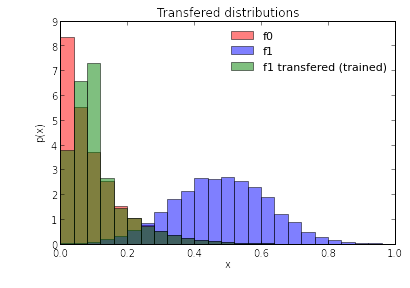

In [41]:

print 'Calculating ratios'
true_dist = True
npoints = 50

score = ROOT.RooArgSet(w.var('score'))
getRatio = singleRatio

# NN trained on complete model
F0pdf = w.function('bkghistpdf_F0_F1')
F1pdf = w.function('sighistpdf_F0_F1')

testdata = test_data[:,:-1]
testtarget = test_data[:,-1]

if true_dist == True and len(vars_g) == 1:
    xarray = np.linspace(1,10,npoints)
      # TODO: Harcoded dist names
    F1dist = np.array([evalDist(x,w.pdf('f1'),[xs]) for xs in xarray])
    F0dist = np.array([evalDist(x,w.pdf('f0'),[xs]) for xs in xarray])
    trueRatio = getRatio(F1dist, F0dist)

    outputs = predict('{0}/{1}_F0_F1.pkl'.format(dir,model_file),xarray,model_g=model_g)

    F1fulldist = np.array([evalDist(score,F1pdf,[xs]) for xs in outputs])
    F0fulldist = np.array([evalDist(score,F0pdf,[xs]) for xs in outputs])

    completeRatio = getRatio(F0fulldist,F1fulldist)
    fig = saveFig(xarray, [completeRatio, trueRatio], makePlotName('all','train',type='ratio'),title='Density Ratios',labels=['Trained', 'Truth'], print_pdf=True,dir=dir)

    
# Make transfer learning

# Transforming f1 into f0
data_f1 = train_data[train_data[:,-1] == 0.]
data_f0 = train_data[train_data[:,-1] == 1.]
testdata = data_f1[:,:-1]
testtarget = data_f1[:,-1]


xarray = testdata

outputs = predict('{0}/{1}_F0_F1.pkl'.format(dir,model_file),xarray,model_g=model_g)

F1fulldist = np.array([evalDist(score,F1pdf,[xs]) for xs in outputs])
F0fulldist = np.array([evalDist(score,F0pdf,[xs]) for xs in outputs])

completeRatio = getRatio(F0fulldist,F1fulldist)

if len(vars_g) == 1:
    F1dist = np.array([evalDist(x,w.pdf('f1'),[xs]) for xs in xarray])
    F0dist = np.array([evalDist(x,w.pdf('f0'),[xs]) for xs in xarray])
else:
    F1dist = np.array([evalDist(x,w.pdf('f1'),xs) for xs in xarray])
    F0dist = np.array([evalDist(x,w.pdf('f0'),xs) for xs in xarray])

trueRatio = getRatio(F1dist, F0dist)

trueIndexes = findOutliers(trueRatio)
completeIndexes = findOutliers(completeRatio)
#indexes = np.logical_and(trueIndexes,completeIndexes)
indexes = completeIndexes
data_f1_red = data_f1
#trueRatio = trueRatio[indexes]
#completeRatio = completeRatio[indexes]
#data_f1_red = data_f1[indexes]


bins = 50
feature = 0
x_range = (-1.,1.)
# Transfering distributions
# Doing histogram manipulation
fig,ax = plt.subplots()
colors = ['b-','r-','k-']
colors_rgb = ['blue','red','black']
    
hist,bins = np.histogram(data_f1[:,feature],bins=bins, range=x_range,density=True)


hist_transfered,bins_1 = np.histogram(data_f1_red[:,feature],weights=trueRatio,bins=bins, range=x_range,density=True)
hist_transfered_clf,bins_2 = np.histogram(data_f1_red[:,feature],bins=bins,weights=completeRatio, range=x_range,density=True)
hist0,bins0 = np.histogram(data_f0[:,feature], bins=bins, range=x_range,density=True)

#hist, bins =  ax.hist(data_f0[:,0],color=colors_rgb[0],label='true',bins=50,histtype='stepfilled',normed=1, alpha=0.5,range=[0,100]) 

widths = np.diff(bins)
#hist_transfered = hist*trueRatio
#hist_transfered_clf = hist*completeRatio

ax.bar(bins[:-1], hist0,widths,label='f0',alpha=0.5,color='red')
ax.bar(bins[:-1], hist,widths,label='f1',alpha=0.5,color='blue')
#ax.bar(bins[:-1], hist_transfered,widths,label='f1 transfered (true)',
#    alpha=0.5,color='blue')
ax.bar(bins[:-1], hist_transfered_clf,widths,label='f1 transfered (trained)',
        alpha=0.5,color='green')

ax.legend(frameon=False,fontsize=11)
ax.set_xlabel('x') 
ax.set_ylabel('p(x)') 
if len(vars_g) > 1:
    ax.set_title('Transfered distributions feature {0}'.format(feature))
else:
    ax.set_title('Transfered distributions')
file_plot =  makePlotName('all','transf',type='hist_v{0}'.format(feature),model_g=model_g) 
fig.savefig('{0}/plots/{1}/{2}.png'.format(dir,model_g,file_plot))

#saveFig(xarray, [true_transfer, data_f0[:,0]], makePlotName('all','transf',type='hist'),title='Transfered distribution',labels=['Transfer True', 'Truth'],hist=True, print_pdf=True,dir=dir)
plt.plot()